点目标分析

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sf

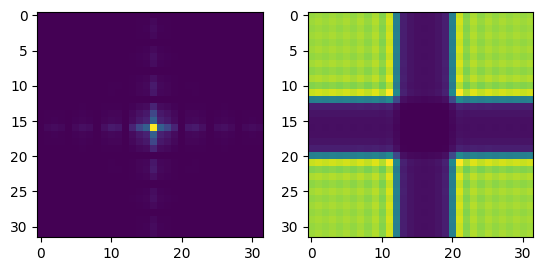

In [3]:

T = 24
N = 32
interval = T/N
t_x = np.linspace(-T/2,T/2-interval,N)
t_y = np.linspace(-T/2,T/2-interval,N)
# t_x = np.linspace(-T/2,T/2,N)
# t_y = np.linspace(-T/2,T/2,N)
plt.figure()
x_image = np.zeros([N,N],dtype=np.complex128)
for i in range(x_image.shape[0]):
    for j in range(x_image.shape[1]):
        x_image[i][j] = np.sinc(t_x[i])*np.sinc(t_y[j])
plt.subplot(1,2,1)
plt.imshow(np.abs(x_image))

x_image_fft = sf.fft2(x_image)
# x_image_fshift = np.fft.fftshift(x_image_fft)
plt.subplot(1,2,2)
plt.imshow(np.abs(x_image_fft))

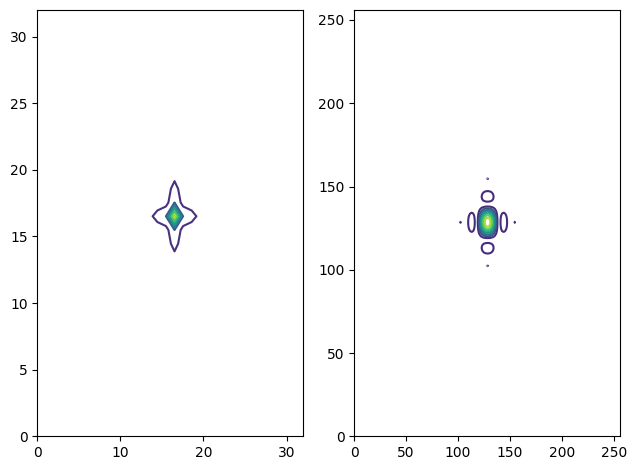

In [4]:
plt.figure()
plt.subplot(1,2,1)
plt.contour(np.linspace(0,N,N),np.linspace(0,N,N),np.abs(x_image))
# plt.colorbar(label='Magnitude')

K = 8
x_pad_fft = np.zeros([K*N,K*N],dtype=np.complex128)
x_pad_fft[0:int(N/2),0:int(N/2)] = x_image_fft[0:int(N/2),0:int(N/2)]
x_pad_fft[0:int(N/2),K*N-int(N/2):K*N] = x_image_fft[0:int(N/2),int(N/2):N]
x_pad_fft[K*N-int(N/2):K*N,0:int(N/2)] = x_image_fft[int(N/2):N,0:int(N/2)]
x_pad_fft[K*N-int(N/2):K*N,K*N-int(N/2):K*N] = x_image_fft[int(N/2):N,int(N/2):N]
x_pad = sf.ifft2(x_pad_fft)
plt.subplot(1,2,2)
plt.contour((np.linspace(0,K*N,K*N)),(np.linspace(0,K*N,K*N)),\
             np.abs(x_pad))
# plt.contour((np.linspace(0,K*N,K*N))[int(K*N/2-N):int(K*N/2+N)],(np.linspace(0,K*N,K*N))[int(K*N/2-N):int(K*N/2+N)],\
#             np.abs(x_pad[int(K*N/2-N):int(K*N/2+N),int(K*N/2-N):int(K*N/2+N)]))
# plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()






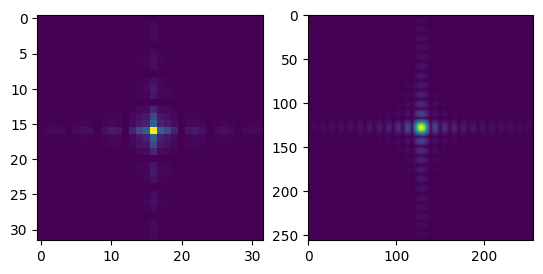

In [5]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.abs(x_image))
plt.subplot(1,2,2)
plt.imshow(np.abs(x_pad))

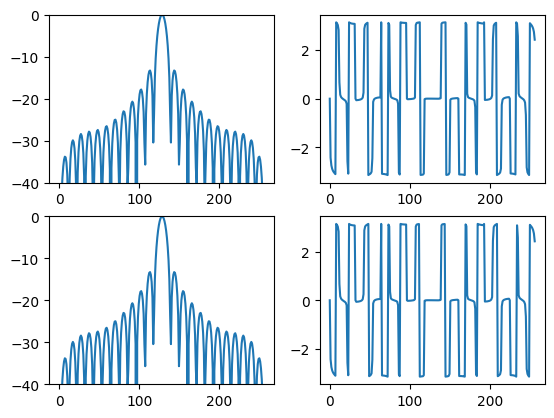

In [6]:
plt.figure()
# vertical
plt.subplot(2,2,1)
plt.plot((np.linspace(0,K*N,K*N)),20*np.log10(np.abs(x_pad[:,int(K*N/2)])/np.abs(x_pad[int(K*N/2),int(K*N/2)])))
plt.ylim(-40,0)
plt.subplot(2,2,2)
plt.plot((np.linspace(0,K*N,K*N)),(np.angle(x_pad[:,int(K*N/2)])))
# horizen
plt.subplot(2,2,3)
plt.plot((np.linspace(0,K*N,K*N)),20*np.log10(np.abs(x_pad[int(K*N/2),:])/np.abs(x_pad[int(K*N/2),int(K*N/2)])))
plt.ylim(-40,0)
plt.subplot(2,2,4)
plt.plot((np.linspace(0,K*N,K*N)),(np.angle(x_pad[int(K*N/2),:])))

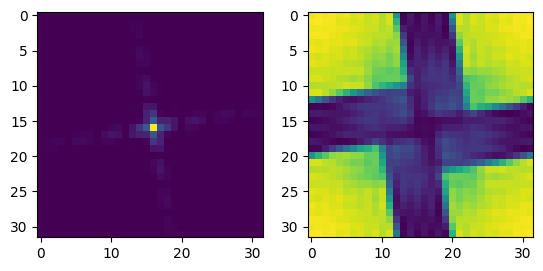

In [7]:
import cv2
# theta = np.radians(-10)
# x_0,y_0 = int(N/2),int(N/2)
# c, s = np.cos(theta), np.sin(theta)
# center = np.array([x_0,y_0])
# R = np.array(((c, -s), (s, c)))
# x_rot = np.zeros_like(x_image)
# for i in range(N):
#     for j in range(N):
#         loc = np.round(R@(np.array([i,j])-center).reshape(2,1)) + center.reshape(2,1)
#         loc = loc.flatten()
#         if (loc[0]>=0 and loc[0]<N) and (loc[1]>=0 and loc[1]<N):
#             x_rot[i,j] = x_image[int(loc[0]),int(loc[1])]
theta = 10
x_0,y_0 = int(N/2),int(N/2)
MAR = cv2.getRotationMatrix2D((x_0,y_0),theta,1.0)  #rotation matrix
x_rot = cv2.warpAffine(np.real(x_image), MAR, (N, N))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.abs(x_rot))
x_rot_fft = sf.fft2(x_rot)
plt.subplot(1,2,2)
plt.imshow(np.abs(x_rot_fft))

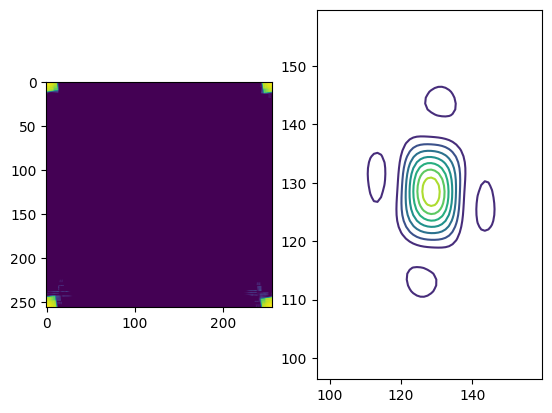

In [8]:
x_rp_fft = np.zeros([N,K*N],dtype=np.complex128)
for i in range(N):
    x_min = np.argmin(np.abs(x_rot_fft[i,:]))
    x_rp_fft[i,0:x_min] = x_rot_fft[i,0:x_min]
    x_rp_fft[i,K*N-(N-x_min):K*N] = x_rot_fft[i,x_min:N]

x_rp_fft_u = np.zeros_like(x_pad_fft)
for j in range(K*N):
    y_min = np.argmin(np.abs(x_rp_fft[:,j]))
    x_rp_fft_u[0:y_min,j] = x_rp_fft[0:y_min,j]
    x_rp_fft_u[K*N-(N-y_min):K*N,j] = x_rp_fft[y_min:N,j]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.abs(x_rp_fft_u))
x_rp = sf.ifft2(x_rp_fft_u) 
plt.subplot(1,2,2)
# plt.contour((np.linspace(0,K*N,K*N)),(np.linspace(0,K*N,K*N)),\
#              np.abs(x_rp))
plt.contour((np.linspace(0,K*N,K*N))[int(K*N/2-N):int(K*N/2+N)],(np.linspace(0,K*N,K*N))[int(K*N/2-N):int(K*N/2+N)],\
            np.abs(x_rp[int(K*N/2-N):int(K*N/2+N),int(K*N/2-N):int(K*N/2+N)]))

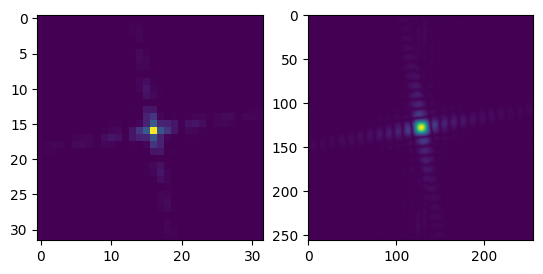

In [10]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.abs(x_rot))
plt.subplot(1,2,2)
plt.imshow(np.abs(x_rp))

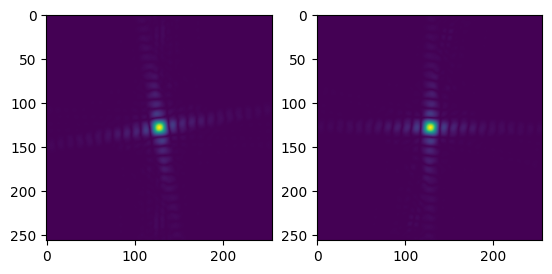

In [13]:
theta = -10
x_0,y_0 = int(K*N/2),int(K*N/2)
MAR = cv2.getRotationMatrix2D((x_0,y_0),theta,1.0)  #rotation matrix
x_rp_r = cv2.warpAffine(np.real(x_rp), MAR, (K*N, K*N))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.abs(x_rp))
plt.subplot(1,2,2)
plt.imshow(np.abs(x_rp_r))


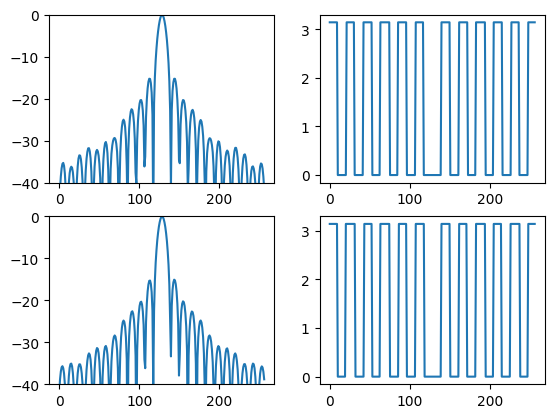

In [14]:
plt.figure()
# vertical
plt.subplot(2,2,1)
plt.plot((np.linspace(0,K*N,K*N)),20*np.log10(np.abs(x_rp_r[:,int(K*N/2)])/np.abs(x_rp_r[int(K*N/2),int(K*N/2)])))
plt.ylim(-40,0)
plt.subplot(2,2,2)
plt.plot((np.linspace(0,K*N,K*N)),(np.angle(x_rp_r[:,int(K*N/2)])))
# horizen
plt.subplot(2,2,3)
plt.plot((np.linspace(0,K*N,K*N)),20*np.log10(np.abs(x_rp_r[int(K*N/2),:])/np.abs(x_rp_r[int(K*N/2),int(K*N/2)])))
plt.ylim(-40,0)
plt.subplot(2,2,4)
plt.plot((np.linspace(0,K*N,K*N)),(np.angle(x_rp_r[int(K*N/2),:])))